In [1]:
import pandas as pd
import numpy as np
import time
import importlib

import matplotlib.pyplot as plt
import seaborn as sns

import rank_eval_pipeline as rep
import eval_algos
import rank_algos

import scipy.stats as stats

In [2]:
# Load data
df = pd.read_csv('data/full_data.csv')
df

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,1,3282490636,3723861767,592628169,2093237750,3617548381,2965721776,3543218850,1072184752,1418147852,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1,1,2736633149,3188050045,3599848058,2300041243,3503728323,1531702445,3543218850,2634671414,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
2,1,1067402948,108565582,2502341442,3474641266,3503728323,1531702445,3543218850,4108477053,870407079,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
3,1,3634365896,2567512859,753387811,2124887610,3503728323,2965721776,3543218850,4108477053,3981694603,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
4,1,3282490636,1241498584,99521842,868270843,3503728323,1531702445,3543218850,4108477053,3377404711,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572873,0,719059834,108565582,1622567635,265581914,3503728323,2965721776,3543218850,3153333045,1315254508,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
1572874,1,3855058850,3117534041,148578446,1880637442,3617548381,1531702445,3543218850,1072184752,603519084,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572875,1,59570122,2236475198,3022312119,2120140848,3503728323,1531702445,3543218850,3371001158,2147952612,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572876,1,1439395589,2819363971,12381797,4195009840,3503728323,2965721776,3543218850,2265512916,2246488302,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631


In [3]:
rank_algos_list = [rank_algos.mutual_info_score, rank_algos.ReliefF_score, rank_algos.chi2_score, rank_algos.xgboost_score, rank_algos.random_forest_score, rank_algos.anova_f_score, rank_algos.pearson_correlation_score]

res_dict = {}
ranks_dict = {}

for rank_algo in rank_algos_list:
    start_time = time.time()
    evaluator = rep.RankEval(df, rank_algo, subsampling_proportion=0.01, seed=1)
    results = evaluator.get_eval_res()
    end_time = time.time()

    print(f'Ranking algorithm: {rank_algo.__name__} took {end_time - start_time} seconds to run')
    res_dict[rank_algo.__name__] = results
    ranks_dict[rank_algo.__name__] = evaluator.get_ranking()



Ranking algorithm: mutual_info_score took 4.6737282276153564 seconds to run
Ranking algorithm: ReliefF_score took 6.371528387069702 seconds to run
Ranking algorithm: chi2_score took 0.2078237533569336 seconds to run
Ranking algorithm: xgboost_score took 0.3813197612762451 seconds to run
Ranking algorithm: random_forest_score took 1.253699541091919 seconds to run
Ranking algorithm: anova_f_score took 0.15031790733337402 seconds to run


A:\Prog_FaksDataScience\Project\DS_Project_Feature_Selection\src\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [70 73 74 75 76 77 78 79 80 92 93 94 95 96 97 98 99] are constant.
A:\Prog_FaksDataScience\Project\DS_Project_Feature_Selection\src\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
A:\Prog_FaksDataScience\Project\DS_Project_Feature_Selection\src\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
A:\Prog_FaksDataScience\Project\DS_Project_Feature_Selection\src\fuji\utils_fuji.py:143: RuntimeWarning: invalid value encountered in double_scalars


Ranking algorithm: pearson_correlation_score took 0.15657973289489746 seconds to run


In [4]:
ranks_dict['mutual_info_score'][:10]

Index(['feature99', 'feature98', 'feature84', 'feature85', 'feature87',
       'feature86', 'feature89', 'feature88', 'feature83', 'feature82'],
      dtype='object')

In [5]:
ranks_dict['ReliefF_score'][:10]

Index(['feature98', 'feature99', 'feature70', 'feature73', 'feature74',
       'feature75', 'feature76', 'feature77', 'feature78', 'feature79'],
      dtype='object')

In [6]:
ranks_dict['chi2_score'][:10]

Index(['feature50', 'feature49', 'feature2', 'feature59', 'feature85',
       'feature87', 'feature88', 'feature89', 'feature86', 'feature84'],
      dtype='object')

In [7]:
# feature99 at the bottom!!!
ranks_dict['xgboost_score']

Index(['feature98', 'feature86', 'feature81', 'feature0', 'feature49',
       'feature22', 'feature82', 'feature1', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature2', 'feature20',
       'feature21', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature3', 'feature30',
       'feature31', 'feature32', 'feature33', 'feature34', 'feature35',
       'feature36', 'feature37', 'feature38', 'feature39', 'feature4',
       'feature40', 'feature41', 'feature42', 'feature43', 'feature44',
       'feature45', 'feature46', 'feature47', 'feature48', 'feature5',
       'feature50', 'feature51', 'feature52', 'feature53', 'feature54',
       'feature55', 'feature56', 'feature57', 'feature58', 'feature59',
       'feature6', 'feature60', 'feature61', 'feature62', 'feature63',
       'feature64', 'feature65', 'feature66', 'feature67', 'feature68',

In [8]:
ranks_dict['random_forest_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature88', 'feature85',
       'feature89', 'feature87', 'feature84', 'feature83', 'feature23'],
      dtype='object')

In [9]:
ranks_dict['anova_f_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature85', 'feature87',
       'feature88', 'feature89', 'feature84', 'feature83', 'feature82'],
      dtype='object')

In [10]:
ranks_dict['pearson_correlation_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature85', 'feature87',
       'feature88', 'feature89', 'feature84', 'feature83', 'feature82'],
      dtype='object')

In [11]:
singles_dict = {}
for rank_algo in rank_algos_list:
    singles_dict[rank_algo.__name__] = res_dict[rank_algo.__name__][0][0]

first_gen_dict = {}
for rank_algo in rank_algos_list:
    first_gen_dict[rank_algo.__name__] = res_dict[rank_algo.__name__][1][0]

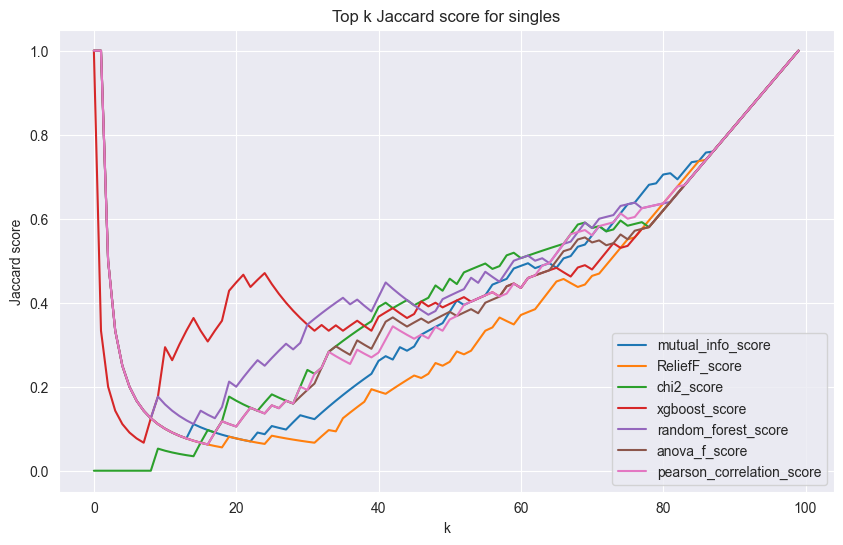

In [12]:
# plot results with k on x-axis
fig, ax = plt.subplots(figsize=(10, 6))

for key in singles_dict:
    ax.plot(singles_dict[key], label=key)

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for singles')
ax.legend()
plt.show()

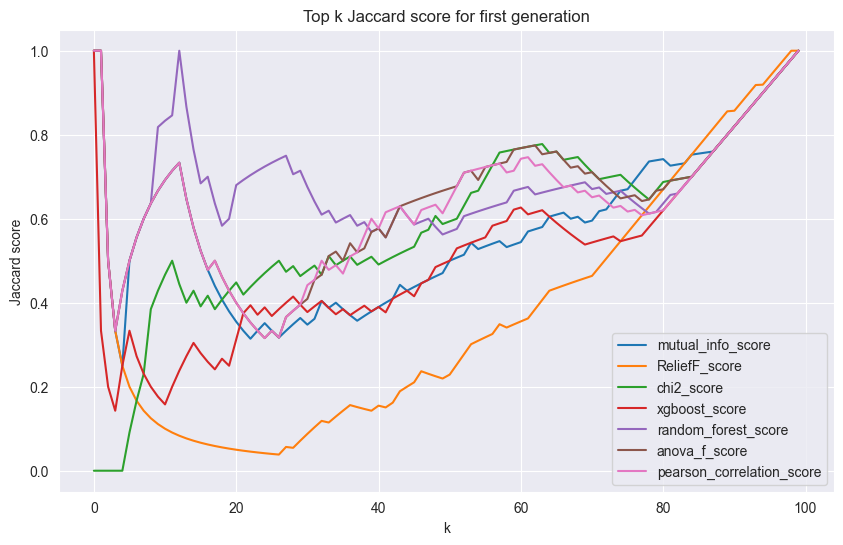

In [13]:
# plot results with k on x-axis
fig, ax = plt.subplots(figsize=(10, 6))

for key in first_gen_dict:
    ax.plot(first_gen_dict[key], label=key)

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for first generation')
ax.legend()
plt.show()


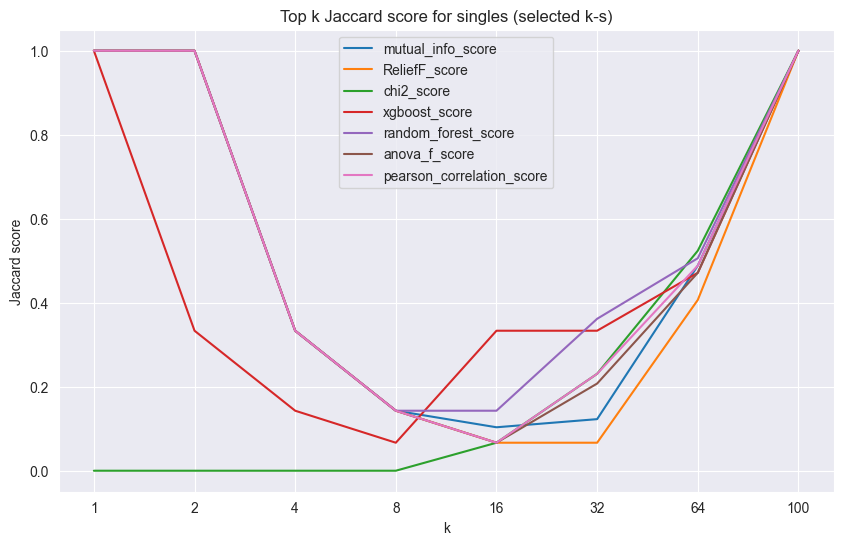

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

for key in singles_dict:
    ax.plot([singles_dict[key][0], singles_dict[key][1], singles_dict[key][3], singles_dict[key][7], singles_dict[key][15], singles_dict[key][31], singles_dict[key][63], singles_dict[key][99]], label=key)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for singles (selected k-s)')
ax.legend()
plt.show()

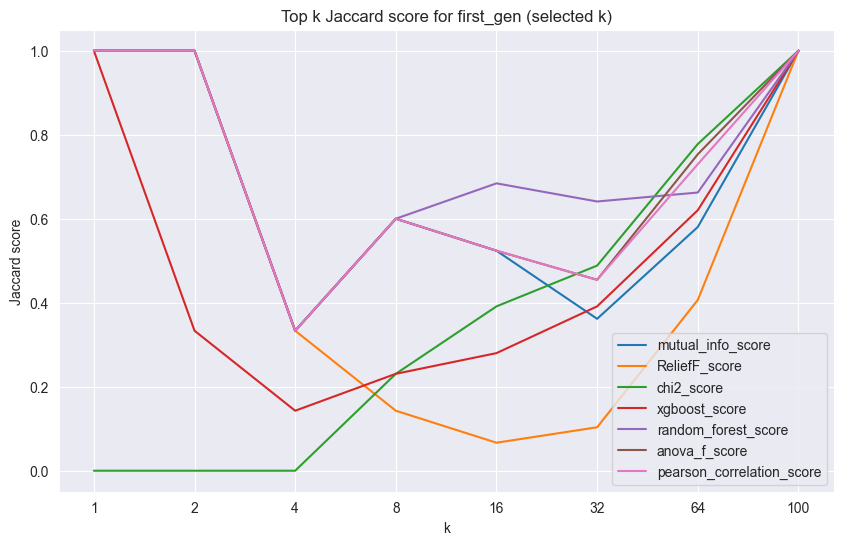

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for key in first_gen_dict:
    ax.plot([first_gen_dict[key][0], first_gen_dict[key][1], first_gen_dict[key][3], first_gen_dict[key][7], first_gen_dict[key][15], first_gen_dict[key][31], first_gen_dict[key][63], first_gen_dict[key][99]], label=key)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for first_gen (selected k)')
ax.legend()
plt.show()

## Plot top k scores for different ranking algos - for report

In [16]:
gt = eval_algos.get_ground_truths_ordered()
gt_single = gt[0].index
gt_first_gen = gt[1].index

In [17]:
cols = df.columns
cols = cols[1:]
cols = cols.to_numpy()

In [18]:
k_list = [1, 2, 4, 8, 16, 32, 64, 100]
k_list = range(1, 101)

# get 1000 jaccard scores for random rankings for each k to get 95CI
random_scores_dict = {}
for i in range(100):
    np.random.shuffle(cols)
    for k in k_list:
        if k not in random_scores_dict:
            random_scores_dict[k] = []
        random_scores_dict[k].append(eval_algos.jaccard_k(cols[:k], gt_first_gen[:k], k))

In [19]:
# do bootstrap for each k
random_bootstrapped = {}
for k in k_list:
    random_bootstrapped[k] = stats.bootstrap((random_scores_dict[k], ), np.mean, confidence_level=0.95, n_resamples=100, method='percentile')

In [20]:
random_bootstrapped[2].confidence_interval.high

0.030000000000000002

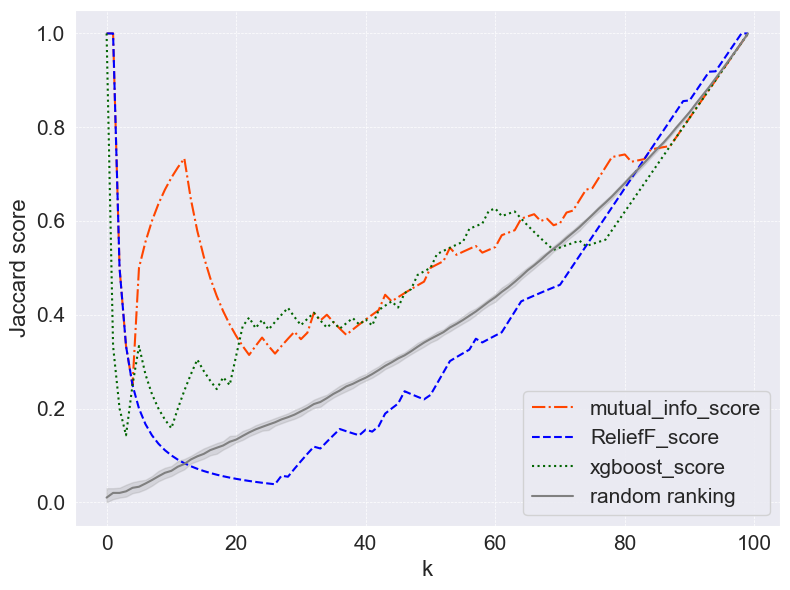

In [36]:
# plot ranking scores of mutual_info_score, ReliefF_score, xgboost_score
# plot mean and 95% CI for random rankings as plot line

fig, ax = plt.subplots(figsize=(8, 6))

colors_dict = {'mutual_info_score': 'orangered', 'ReliefF_score': 'blue', 'xgboost_score': 'darkgreen'}
dashed_lines_dict = {'mutual_info_score': '-.', 'ReliefF_score': '--', 'xgboost_score': ':'}


for key in ['mutual_info_score', 'ReliefF_score', 'xgboost_score']:
    ax.plot(first_gen_dict[key], label=key, color=colors_dict[key], linestyle=dashed_lines_dict[key])

random_mean_list = []
random_ci_list = []
random_ci_low_list = []
random_ci_high_list = []
random_max_list = []
random_min_list = []
for k in k_list:
    random_mean = np.mean(random_scores_dict[k])
    random_ci_low = random_bootstrapped[k].confidence_interval.low
    random_ci_high = random_bootstrapped[k].confidence_interval.high
    #random_ci = 1.96 * np.std(random_scores_dict[k])
    # take 5 max and 5 min values to get 95% CI
    #random_scores_dict[k].sort()
    #random_scores_dict[k] = random_scores_dict[k][5:-5]
    #random_mean = np.mean(random_scores_dict[k])
    #random_max = max(random_scores_dict[k])
    #random_min = min(random_scores_dict[k])
    random_mean_list.append(random_mean)
    random_ci_low_list.append(random_ci_low)
    random_ci_high_list.append(random_ci_high)
    #random_max_list.append(random_max)
    #random_min_list.append(random_min)

#print(np.array(random_mean_list) - np.array(random_ci_list), np.array(random_mean_list) + np.array(random_ci_list))

ax.plot(random_mean_list, label='random ranking', color='grey')
x = [k-1 for k in k_list]
ax.fill_between(x, random_ci_low_list, random_ci_high_list, alpha=0.2, color='grey')
#ax.fill_between(x, random_min_list, random_max_list, alpha=0.2, color='grey')

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
#ax.set_title('Ranking evaluation comparison for \'first generation\' ground truth')
ax.legend()

ax.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.title.set_size(18)
# legend font size
ax.legend(prop={'size': 15})

# add grid
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('img/report_top_k_scores_first_gen.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# same plot but using seaborn



Remove some features and rank with mutual info score

In [ ]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

In [ ]:
gt = eval_algos.get_ground_truths_ordered()
gt_single = gt[0].index
gt_first_gen = gt[1].index

In [ ]:
importlib.reload(eval_algos)

singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: all features')
ax.legend()
plt.show()

In [ ]:
bad_features = []

one_unique_val_features = ["feature70", "feature92", "feature93", "feature94", "feature95", "feature96", "feature97"]
bad_features.extend(one_unique_val_features)

In [ ]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

In [ ]:
importlib.reload(eval_algos)

singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless features')
ax.legend()
plt.show()

In [ ]:
high_cardinality_features = ["feature1", "feature2", "feature3", "feature8", "feature9", "feature10", "feature21", "feature33", "feature36", "feature47", "feature49", "feature50", "feature51", "feature52", "feature53", "feature54", "feature59", "feature60", "feature66", "feature71"]
bad_features.extend(high_cardinality_features)

In [ ]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

In [ ]:
singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless & high cardinality features')
ax.legend()
plt.show()

In [ ]:
sparse_features = ["feature8", "feature28", "feature29", "feature56", "feature68", "feature70", "feature71", "feature72", "feature73", "feature74", "feature75", "feature76", "feature77", "feature79", "feature92", "feature93", "feature94", "feature95", "feature96", "feature97"]
bad_features.extend(sparse_features)

In [ ]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

In [ ]:
singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless, high cardinality & sparse features')
ax.legend()
plt.show()